In [89]:
from sklearn.model_selection import train_test_split

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from re import sub
from decimal import Decimal
from sklearn.preprocessing import MultiLabelBinarizer
from scipy import stats

airbnb_uc=pd.read_csv("listings_CPH.csv")

In [91]:
#Dropping unnecessary columns = 

#airbnb_uc.drop("name","host_id", "neighbourhood_group","license","host_name","last_review", inplace=True, axis=1)

#name not relevant
airbnb_uc.drop('name', inplace=True, axis=1)

#host_id not relevant
airbnb_uc.drop('host_id', inplace=True, axis=1)

#neighbourhood column only contains NaN values
airbnb_uc.drop('neighbourhood_group', inplace=True, axis=1)

#license column only contains NaN values
airbnb_uc.drop("license", inplace=True, axis=1)

#host_names not relevant
airbnb_uc.drop("host_name", inplace=True, axis=1)

#last_review not relevant
airbnb_uc.drop("last_review", inplace=True, axis=1)

#Replace NaN values in reviews_per_month with 0
airbnb_uc.fillna({'reviews_per_month':0}, inplace=True)
airbnb_uc.reviews_per_month.isnull().sum()

# Create dummy variables for neighboorhood column

set(airbnb_uc['neighbourhood'])
neighbourhood = pd.get_dummies(airbnb_uc['neighbourhood'].str.lower().str.replace(' ', '_'))
airbnb_uc1 = pd.merge(airbnb_uc, neighbourhood, left_index=True, right_index=True)
airbnb_uc1 = airbnb_uc1.drop('neighbourhood', 1)

airbnb_uc1.head()

# Create dummy variables for room type column

room_type = pd.get_dummies(airbnb_uc['room_type'])
airbnb = pd.merge(airbnb_uc1, room_type, left_index=True, right_index=True)
airbnb = airbnb.drop('room_type', 1)

airbnb.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,indre_by,nrrebro,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire home/apt,Hotel room,Private room,Shared room
0,6983,55.686410,12.547410,898,3,172,1.08,1,0,4,...,0,1,0,0,0,0,1,0,0,0
1,26057,55.693070,12.576490,2600,4,59,0.55,1,303,8,...,1,0,0,0,0,0,1,0,0,0
2,26473,55.676020,12.575400,3250,3,300,2.06,3,56,7,...,1,0,0,0,0,0,1,0,0,0
3,29118,55.670230,12.555040,725,7,24,0.16,1,59,2,...,0,0,0,0,0,1,1,0,0,0
4,31094,55.666602,12.555283,1954,3,19,0.13,1,0,2,...,0,0,0,0,0,1,1,0,0,0


In [92]:
# normalizing price, minimum nights, number of reviews, reviews per month, 
# calculated host listings count and availibilty for values between 0 and 1.

def normalizing(column):
    new_column = (column - column.min()) / (column.max() - column.min())
    return new_column

#airbnb['price'] = normalizing(airbnb['price'])
airbnb['minimum_nights'] = normalizing(airbnb['minimum_nights'])
airbnb['number_of_reviews'] = normalizing(airbnb['number_of_reviews'])
airbnb['reviews_per_month'] = normalizing(airbnb['reviews_per_month'])
airbnb['calculated_host_listings_count'] = normalizing(airbnb['calculated_host_listings_count'])
airbnb['availability_365'] = normalizing(airbnb['availability_365'])
airbnb['number_of_reviews_ltm'] = normalizing(airbnb['number_of_reviews_ltm'])

airbnb.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,indre_by,nrrebro,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire home/apt,Hotel room,Private room,Shared room
0,6983,55.686410,12.547410,898,0.001802,0.241913,0.044963,0.000000,0.000000,0.008493,...,0,1,0,0,0,0,1,0,0,0
1,26057,55.693070,12.576490,2600,0.002703,0.082982,0.022898,0.000000,0.830137,0.016985,...,1,0,0,0,0,0,1,0,0,0
2,26473,55.676020,12.575400,3250,0.001802,0.421941,0.085762,0.011236,0.153425,0.014862,...,1,0,0,0,0,0,1,0,0,0
3,29118,55.670230,12.555040,725,0.005405,0.033755,0.006661,0.000000,0.161644,0.004246,...,0,0,0,0,0,1,1,0,0,0
4,31094,55.666602,12.555283,1954,0.001802,0.026723,0.005412,0.000000,0.000000,0.004246,...,0,0,0,0,0,1,1,0,0,0


In [93]:
airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,indre_by,nrrebro,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire home/apt,Hotel room,Private room,Shared room
count,1.381500e+04,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,...,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000
mean,1.719385e+17,55.680569,12.557805,1205.878972,0.003248,0.026120,0.033147,0.019105,0.255624,0.011573,...,0.149692,0.164169,0.109374,0.047991,0.025335,0.165762,0.885270,0.001086,0.112269,0.001375
std,2.852538e+17,0.021088,0.033512,1433.143149,0.015225,0.051199,0.045081,0.119655,0.337430,0.024149,...,0.356783,0.370443,0.312119,0.213756,0.157146,0.371880,0.318708,0.032934,0.315709,0.037061
min,6.983000e+03,55.609510,12.435670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.907962e+07,55.666110,12.540285,729.000000,0.000901,0.002813,0.006245,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.931542e+07,55.681190,12.555520,995.000000,0.001802,0.009845,0.017902,0.000000,0.054795,0.006369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.665348e+17,55.695770,12.580741,1368.500000,0.002703,0.028129,0.041632,0.000000,0.476712,0.012739,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,7.222925e+17,55.742800,12.651740,64900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
#df=pd.read_csv("listings_CPH.CSV")
df=airbnb.copy()

In [95]:
df.shape

(13815, 25)

In [96]:

#df_price=df.price.copy()
#df_price[1].sort_values(ascending=True)

#df_price['price']=df_price[1]
#df_price.head()
df.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,indre_by,nrrebro,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire home/apt,Hotel room,Private room,Shared room
0,6983,55.686410,12.547410,898,0.001802,0.241913,0.044963,0.000000,0.000000,0.008493,...,0,1,0,0,0,0,1,0,0,0
1,26057,55.693070,12.576490,2600,0.002703,0.082982,0.022898,0.000000,0.830137,0.016985,...,1,0,0,0,0,0,1,0,0,0
2,26473,55.676020,12.575400,3250,0.001802,0.421941,0.085762,0.011236,0.153425,0.014862,...,1,0,0,0,0,0,1,0,0,0
3,29118,55.670230,12.555040,725,0.005405,0.033755,0.006661,0.000000,0.161644,0.004246,...,0,0,0,0,0,1,1,0,0,0
4,31094,55.666602,12.555283,1954,0.001802,0.026723,0.005412,0.000000,0.000000,0.004246,...,0,0,0,0,0,1,1,0,0,0


In [97]:
#Firstly, we want to make a binary classifier. We therefore need reduce the different prices to a categorical binary target variable. We 
#will use the categories ‘low’ and 'high' as the target variable. To separate the data we need to define a treshold, were observations with a 
# rental price below the threshold will be categorized as 'low', and observations with renatl price above the threshold will be categorized as
# 'high'. We will here take a look at both the median and the mean.

median=df.price.median()
mean=df.price.mean()
#df.price=df.price.astype(float)
print(median)

995.0


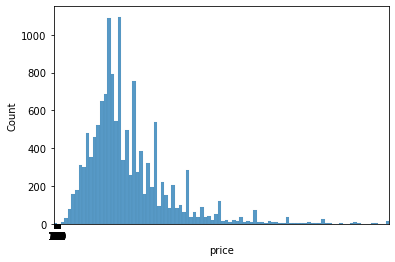

In [98]:
fig, ax = plt.subplots()
sns.histplot(df.price, ax=ax)
ax.set_xlim(1,5000)
ax.set_xticks(range(1,100))
plt.plot( linewidth=2)
plt.show()

In [99]:
#Above_Median=df[df.price> 995]


In [100]:
print('number of houses with pricing over the median', len(df[df.price>mean]))
print('number of houses with pricing below the median', len(df[df.price<mean]))
print('number of houses with pricing over the median', len(df[df.price>median]))
print('number of houses with pricing below the median', len(df[df.price<median]))

number of houses with pricing over the median 4280
number of houses with pricing below the median 9535
number of houses with pricing over the median 6845
number of houses with pricing below the median 6899


In [101]:
#We can see that the median splits the observations mmore evenly than using the mean. 
# We will therefore use the median as threshold, to gain a more balanced dataset.

In [102]:
df['high']=df['price'].apply(lambda x: x>median)
df.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,...,nrrebro,sterbro,valby,vanlse,vesterbro-kongens_enghave,Entire home/apt,Hotel room,Private room,Shared room,high
0,6983,55.686410,12.547410,898,0.001802,0.241913,0.044963,0.000000,0.000000,0.008493,...,1,0,0,0,0,1,0,0,0,False
1,26057,55.693070,12.576490,2600,0.002703,0.082982,0.022898,0.000000,0.830137,0.016985,...,0,0,0,0,0,1,0,0,0,True
2,26473,55.676020,12.575400,3250,0.001802,0.421941,0.085762,0.011236,0.153425,0.014862,...,0,0,0,0,0,1,0,0,0,True
3,29118,55.670230,12.555040,725,0.005405,0.033755,0.006661,0.000000,0.161644,0.004246,...,0,0,0,0,1,1,0,0,0,False
4,31094,55.666602,12.555283,1954,0.001802,0.026723,0.005412,0.000000,0.000000,0.004246,...,0,0,0,0,1,1,0,0,0,True


In [103]:
#Multi Class Classification: 
#For the multi class classification, se will again need to reduce the the price down to a categorical attribute with 3 values: 'low', 'med', 'high'.
#We will split the observations using the percentiles as threschold.
mediumPerc=np.percentile(df['price'], 33)
highPerc=np.percentile(df['price'], 66)
print(highPerc)
print(mediumPerc)

1200.0
800.0


In [104]:
print('number of houses with pricing low', len(df[df.price<mediumPerc]))
print('number of houses with pricing medium', len(df[df.price > mediumPerc])-len(df[df.price>highPerc]))
print('number of houses with pricing high', len(df[df.price>highPerc]))
#'low’ means that the price of the rental is lower than the 33th percentile of prices in the city, 
# ‘medium’ means that the price is between the 33th and 66th percentile, 
# and ‘high’ that the price higher than the 66th percentile.
# As we can see this gives an quite eve split and a balanced dataset.

number of houses with pricing low 4221
number of houses with pricing medium 4799
number of houses with pricing high 4289


In [105]:
df['Price Category'] = np.where(df.price <= mediumPerc, 'low', np.where(df.price >= highPerc  , 'high', 'med'))
# df['Price Category'] = np.where(df.price <= mediumPerc, 1, 
#                                   np.where(df.price >= highPerc  , 3, 2))
df.head().T

,0,1,2,3,4
id,6983,26057,26473,29118,31094
latitude,55.68641,55.69307,55.67602,55.67023,55.666602
longitude,12.54741,12.57649,12.5754,12.55504,12.555283
price,898,2600,3250,725,1954
minimum_nights,0.001802,0.002703,0.001802,0.005405,0.001802
number_of_reviews,0.241913,0.082982,0.421941,0.033755,0.026723
reviews_per_month,0.044963,0.022898,0.085762,0.006661,0.005412
calculated_host_listings_count,0.0,0.0,0.011236,0.0,0.0
availability_365,0.0,0.830137,0.153425,0.161644,0.0
number_of_reviews_ltm,0.008493,0.016985,0.014862,0.004246,0.004246


In [106]:
df2=df.copy()

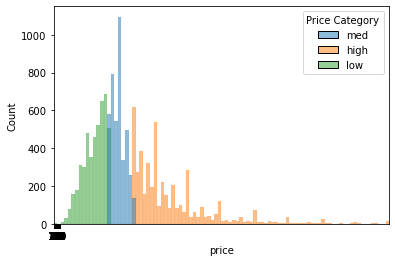

In [107]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="price", hue="Price Category")
ax.set_xlim(1,5000)
ax.set_xticks(range(1,100))
plt.show()

In [108]:
# df2 = df2.drop('name', axis=1)
# df2 = df2.drop('host_name', axis=1)
# df2 = df2.drop('neighbourhood', axis=1)
# df2 = df2.drop('neighbourhood_group', axis=1)
# df2 = df2.drop('room_type', axis=1)
# df2 = df2.drop('license', axis=1)
# df2 = df2.drop('last_review', axis=1)
#df2['last_review']=pd.to_datetime(df2['last_review'], format="%Y-%m-%d %H:%M:%S")

# x_train_std=(x_train-x_train.mean())/x_train.std()
# x_test_std=(x_test-x_train.mean())/x_train.std()
# x_train.head()

In [109]:

split=int(len(df2)*2.0/3)
training=df2[:split]
test=df2[split:]

In [110]:
x_train=training[[ 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'amager_st', 'amager_vest', 'bispebjerg',
       'brnshj-husum', 'frederiksberg', 'indre_by', 'nrrebro', 'sterbro',
       'valby', 'vanlse', 'vesterbro-kongens_enghave', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room']]
x_test=test[[ 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'amager_st', 'amager_vest', 'bispebjerg',
       'brnshj-husum', 'frederiksberg', 'indre_by', 'nrrebro', 'sterbro',
       'valby', 'vanlse', 'vesterbro-kongens_enghave', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room']]
# x_train=x_train.dropna(axis=0)
# x_test=x_test.dropna(axis=0)

In [111]:
y_train=training['high']
y_test=test['high']

In [112]:
x_train.head().T

,0,1,2,3,4
latitude,55.686410,55.693070,55.676020,55.670230,55.666602
longitude,12.547410,12.576490,12.575400,12.555040,12.555283
minimum_nights,0.001802,0.002703,0.001802,0.005405,0.001802
number_of_reviews,0.241913,0.082982,0.421941,0.033755,0.026723
reviews_per_month,0.044963,0.022898,0.085762,0.006661,0.005412
calculated_host_listings_count,0.000000,0.000000,0.011236,0.000000,0.000000
availability_365,0.000000,0.830137,0.153425,0.161644,0.000000
number_of_reviews_ltm,0.008493,0.016985,0.014862,0.004246,0.004246
amager_st,0.000000,0.000000,0.000000,0.000000,0.000000
amager_vest,0.000000,0.000000,0.000000,0.000000,0.000000


In [113]:
def build_log_reg_classifiers( x_train, y_train, x_test, y_test):
    from sklearn.linear_model import LogisticRegression
    LogReg=LogisticRegression(max_iter=100000)
    LogReg.fit(x_train, y_train)
    LogReg.score(x_test,y_test)
    y_pred=LogReg.predict(x_test)
    return LogReg, y_pred

In [114]:
#First we will try using logistic regression

model, y_pred= build_log_reg_classifiers(x_train, y_train, x_test, y_test)

the f1 score is 0.6625181497614602


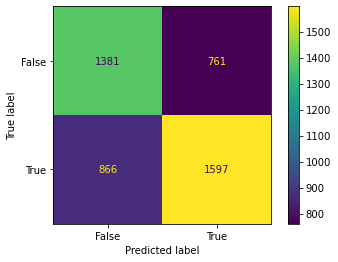

In [115]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
plot_confusion_matrix(model, x_test, y_test)  
print('the f1 score is',f1_score(y_test,y_pred))
print('the accuracy score is',model.score(x_test,y_test))

In [116]:
#Multi classification
MultiLogReg=LogisticRegression(max_iter=100000)
y_train=training['Price Category']
y_test=test['Price Category']


In [117]:
MultiLogReg.fit(x_train, y_train)
MultiLogReg.score(x_test,y_test)

0.4922909880564604

In [118]:
y_test

9210     high
9211      low
9212      low
9213     high
9214     high
         ... 
13810    high
13811     low
13812     low
13813     med
13814     low
Name: Price Category, Length: 4605, dtype: object

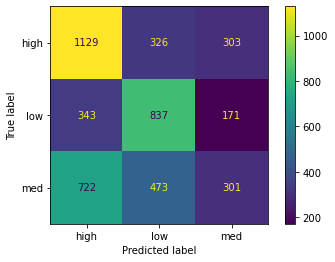

In [119]:
y_multi_pred=MultiLogReg.predict(x_test)
#print('the f1 score is',f1_score(y_test,y_multi_pred))
plot_confusion_matrix(MultiLogReg, x_test, y_test)  

In [120]:
from sklearn import metrics
macro_averaged_f1 = metrics.f1_score(y_test, y_multi_pred, average = 'macro')
print(macro_averaged_f1)
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")

0.4656220869389909
Macro-Averaged F1 score using sklearn library : 0.4656220869389909


In [121]:
micro_averaged_f1 = metrics.f1_score(y_test, y_multi_pred, average = 'micro')
print(f"Micro-Averaged F1 score using sklearn library : {micro_averaged_f1}")

Micro-Averaged F1 score using sklearn library : 0.4922909880564604


In [122]:
MultiLogReg.coef_
#forklare coeffesienten
# lazy predict

array([[-0.34241101,  1.43882209, -1.72062331, -1.01873634, -1.06723639,
         1.0605026 ,  1.24190181, -0.19919   , -0.19641773,  0.23665759,
        -0.72370524,  0.16101636,  0.15818902,  0.76920539, -0.26271659,
        -0.01146103, -0.0990115 , -0.11029913,  0.08954093,  0.80834375,
         0.44944109, -0.38699179, -0.85979498],
       [ 0.38033141, -1.56140122,  1.41391332,  1.35858242,  0.61539297,
        -1.36608109, -1.21563831,  0.07084714,  0.23704751, -0.22803015,
         0.79554612, -0.07375428, -0.22980793, -0.88421046,  0.13892917,
        -0.01696351,  0.1715387 ,  0.33415948, -0.24795848, -1.4055531 ,
         0.02642335,  0.66286102,  0.7127649 ],
       [-0.0379204 ,  0.12257912,  0.30670999, -0.33984608,  0.45184342,
         0.30557849, -0.0262635 ,  0.12834286, -0.04062978, -0.00862744,
        -0.07184087, -0.08726209,  0.07161891,  0.11500507,  0.12378742,
         0.02842455, -0.0725272 , -0.22386035,  0.15841755,  0.59720935,
        -0.47586444, -0.2758